In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import  RBF

import Bgolearn.BGOsampling as BGOS 

 Bgolearn : A Bayesian global optimization package 
 10 Jul 2022, version 1, Bin Cao, MGI, SHU, Shanghai, CHINA.


In [2]:
def function(X):
    X = np.array(X)
    Y = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8 + np.random.normal(loc=0.0, scale=0.2, size=None)
    return Y

In [3]:
data = pd.read_csv('data.csv')
data_matrix = data.iloc[:,:-1]
Measured_response = data.iloc[:,-1]

## design virtual samples

In [4]:
virtual_samples = np.linspace(0,11,100)

## define a callable Kriging model

In [5]:
class Kriging_model(object):
    def fit_pre(self,xtrain,ytrain,xtest):
        # instantiated model
        kernel = RBF() 
        mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = 0.2**2).fit(xtrain,ytrain)
        # defined the attribute's outputs
        mean,std = mdoel.predict(xtest,return_std=True)
        return mean,std    

## instantiate Bgolearn

In [6]:
Bgolearn = BGOS.Bgolearn()

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [5.11111111]


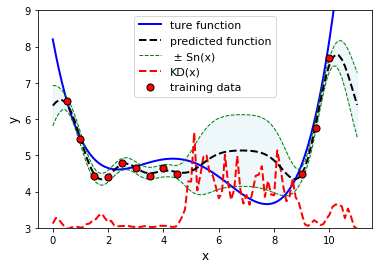

In [8]:
plt.figure()
ax1 = plt.subplot()
ax1.set_ylim([3, 9])
    
y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix,Measured_response,virtual_samples.reshape(-1,1))
ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(virtual_samples,function(virtual_samples),'b',lw=2,label="ture function")
ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

Bgolearn = BGOS.Bgolearn()
# min_search = False:  searching the global maximum
model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
ax1.plot(virtual_samples,model.KD(MC_num=50)*10 + 3,'r--',lw=2,label='KD(x)')


plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)
plt.savefig('KD-1.png',dpi=800)   

In [9]:
function(5.1)  # x keeps one decimal place

4.731440558818154

## add datum (5.1,4.7314) into dataset

## 1-th iterations

In [10]:
data = pd.read_csv('data1.csv')
data_matrix = data.iloc[:,:-1]
Measured_response = data.iloc[:,-1]

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [8.11111111]


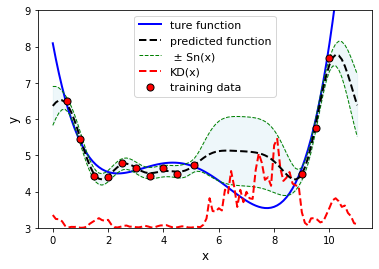

In [11]:
plt.figure()
ax1 = plt.subplot()
ax1.set_ylim([3, 9])
    
y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix,Measured_response,virtual_samples.reshape(-1,1))
ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(virtual_samples,function(virtual_samples),'b',lw=2,label="ture function")
ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

Bgolearn = BGOS.Bgolearn()
# min_search = False:  searching the global maximum
model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
ax1.plot(virtual_samples,model.KD(MC_num=50)*10 + 3,'r--',lw=2,label='KD(x)')


plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)
plt.savefig('KD-2.png',dpi=800)   

In [12]:
function(8.1)  # x keeps one decimal place

3.2314797329115463

## add datum (8.1,3.2315) into dataset

## 2-th iterations

In [14]:
data = pd.read_csv('data2.csv')
data_matrix = data.iloc[:,:-1]
Measured_response = data.iloc[:,-1]

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [7.11111111]


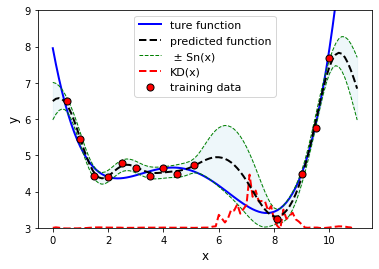

In [15]:
plt.figure()
ax1 = plt.subplot()
ax1.set_ylim([3, 9])
    
y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix,Measured_response,virtual_samples.reshape(-1,1))
ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(virtual_samples,function(virtual_samples),'b',lw=2,label="ture function")
ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

Bgolearn = BGOS.Bgolearn()
# min_search = False:  searching the global maximum
model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
ax1.plot(virtual_samples,model.KD(MC_num=50)*10 + 3,'r--',lw=2,label='KD(x)')


plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)
plt.savefig('KD-3.png',dpi=800)   

In [15]:
function(7.1)  # x keeps one decimal place

3.5167048705080597

## add datum (7.1,3.5167) into dataset

## 3-th iterations

In [ ]:
data = pd.read_csv('data3.csv')
data_matrix = data.iloc[:,:-1]
Measured_response = data.iloc[:,-1]

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [6.66666667]


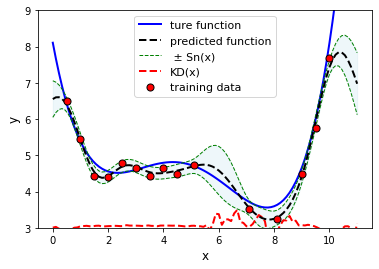

In [17]:
plt.figure()
ax1 = plt.subplot()
ax1.set_ylim([3, 9])
    
y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix,Measured_response,virtual_samples.reshape(-1,1))
ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(virtual_samples,function(virtual_samples),'b',lw=2,label="ture function")
ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

Bgolearn = BGOS.Bgolearn()
# min_search = False:  searching the global maximum
model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
ax1.plot(virtual_samples,model.KD(MC_num=50)*10 + 3,'r--',lw=2,label='KD(x)')


plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)
plt.savefig('KD-4.png',dpi=800)   

In [19]:
function(6.7)

3.777109248276787

## add datum (6.7,3.7771) into dataset
## 4-th iterations

In [21]:
data = pd.read_csv('data4.csv')
data_matrix = data.iloc[:,:-1]
Measured_response = data.iloc[:,-1]

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [7.33333333]


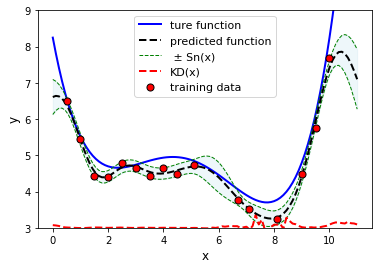

In [22]:
plt.figure()
ax1 = plt.subplot()
ax1.set_ylim([3, 9])
    
y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix,Measured_response,virtual_samples.reshape(-1,1))
ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(virtual_samples,function(virtual_samples),'b',lw=2,label="ture function")
ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

Bgolearn = BGOS.Bgolearn()
# min_search = False:  searching the global maximum
model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
ax1.plot(virtual_samples,model.KD(MC_num=50)*10 + 3,'r--',lw=2,label='KD(x)')


plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)
plt.savefig('KD-5.png',dpi=800)   

In [23]:
function(7.3)

3.352512096564797

## add datum (7.3,3.3525) into dataset
## 5-th iterations

In [24]:
data = pd.read_csv('data5.csv')
data_matrix = data.iloc[:,:-1]
Measured_response = data.iloc[:,-1]

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [10.33333333]


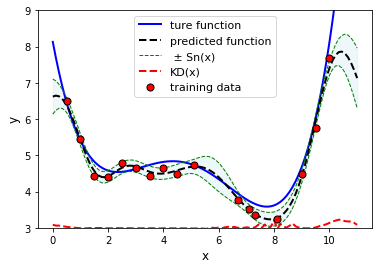

In [25]:
plt.figure()
ax1 = plt.subplot()
ax1.set_ylim([3, 9])
    
y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix,Measured_response,virtual_samples.reshape(-1,1))
ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(virtual_samples,function(virtual_samples),'b',lw=2,label="ture function")
ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

Bgolearn = BGOS.Bgolearn()
# min_search = False:  searching the global maximum
model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
ax1.plot(virtual_samples,model.KD(MC_num=50)*10 + 3,'r--',lw=2,label='KD(x)')


plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)
plt.savefig('KD-6.png',dpi=800)   

In [26]:
function(10.3)

9.610692014084504

## add datum (10.3,9.6107) into dataset
## 6-th iterations

In [27]:
data = pd.read_csv('data6.csv')
data_matrix = data.iloc[:,:-1]
Measured_response = data.iloc[:,-1]

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [10.88888889]


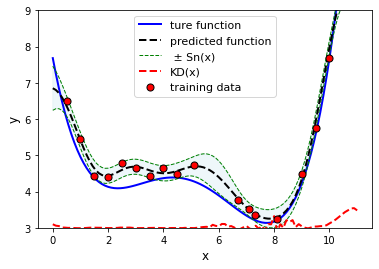

In [28]:
plt.figure()
ax1 = plt.subplot()
ax1.set_ylim([3, 9])
    
y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix,Measured_response,virtual_samples.reshape(-1,1))
ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(virtual_samples,function(virtual_samples),'b',lw=2,label="ture function")
ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

Bgolearn = BGOS.Bgolearn()
# min_search = False:  searching the global maximum
model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
ax1.plot(virtual_samples,model.KD(MC_num=50)*10 + 3,'r--',lw=2,label='KD(x)')


plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)
plt.savefig('KD-7.png',dpi=800)   

In [29]:
function(10.9)

14.548336771862676

## add datum (10.9,14.5483) into dataset
## 7-th iterations

In [31]:
data = pd.read_csv('data7.csv')
data_matrix = data.iloc[:,:-1]
Measured_response = data.iloc[:,-1]

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [6.22222222]


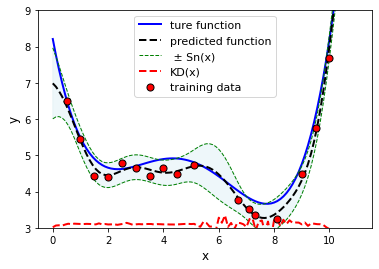

In [32]:
plt.figure()
ax1 = plt.subplot()
ax1.set_ylim([3, 9])
    
y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix,Measured_response,virtual_samples.reshape(-1,1))
ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(virtual_samples,function(virtual_samples),'b',lw=2,label="ture function")
ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

Bgolearn = BGOS.Bgolearn()
# min_search = False:  searching the global maximum
model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
ax1.plot(virtual_samples,model.KD(MC_num=50)*10 + 3,'r--',lw=2,label='KD(x)')


plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)
plt.savefig('KD-8.png',dpi=800)   

In [33]:
function(6.2)

3.810199312516895

## add datum (6.2,3.8102) into dataset
## 8-th iterations

In [34]:
data = pd.read_csv('data8.csv')
data_matrix = data.iloc[:,:-1]
Measured_response = data.iloc[:,-1]

The 2000-th Monte carlo simulation
The 4000-th Monte carlo simulation
The next datum recomended by Knowledge Gradient : 
 x =  [8.66666667]


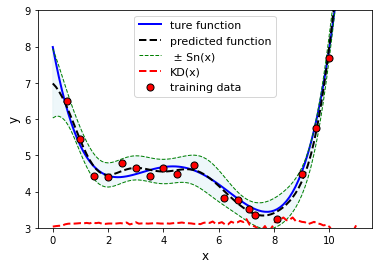

In [35]:
plt.figure()
ax1 = plt.subplot()
ax1.set_ylim([3, 9])
    
y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix,Measured_response,virtual_samples.reshape(-1,1))
ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(virtual_samples,function(virtual_samples),'b',lw=2,label="ture function")
ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

Bgolearn = BGOS.Bgolearn()
# min_search = False:  searching the global maximum
model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
ax1.plot(virtual_samples,model.KD(MC_num=50)*10 + 3,'r--',lw=2,label='KD(x)')


plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)
plt.savefig('KD-9.png',dpi=800)   

# failed